In [1]:
#Date: 26/06/2021
#Author: Vijay Kumar Mishra
#Task: Illustration of Decision Tree in Logistic Regression
#Data: National Family Health Survey (NFHS)

In [2]:
# load some required packages used for data mining and related aspects
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as pit
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import itertools
from sklearn import preprocessing
%matplotlib inline

In [3]:
vkm_nfh= '~/Desktop/vkm/IAIR74FL_pw.dta'

In [5]:
vkm_fhs, meta=pyreadstat.read_dta("IAIR74FL_pw.dta", apply_value_formats=True)

In [6]:
vkm_fhs.head()

,caseid,v000,v001,v002,v003,v004,v005,v006,v007,v008,...,v159,v190,v213,v463c,v463f,v463g,v463z,s710c,s710e,s712
0,01000445 08,IA6,10004,45,8,4,22873,6,2015,1386,...,less than once a week,middle,yes,no,no,yes,no,no,no,no
1,01000671 02,IA6,10006,71,2,6,24436,4,2015,1384,...,not at all,poorer,yes,no,no,yes,no,no,no,yes
2,01000683 02,IA6,10006,83,2,6,24436,4,2015,1384,...,almost every day,richer,yes,no,no,no,"yes, smokes nothing",no,no,NaN
3,01000702 02,IA6,10007,2,2,7,1204,4,2015,1384,...,at least once a week,richest,yes,no,no,no,"yes, smokes nothing",no,no,NaN
4,01000723 02,IA6,10007,23,2,7,1204,5,2015,1385,...,less than once a week,poorer,yes,no,no,no,"yes, smokes nothing",no,no,NaN


In [7]:
vkm_fhs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
v001,32428.0,201979.690884,1.056895e+05,10004.0,120248.25,200047.0,310194.25,360477.0
v002,32428.0,50.251974,2.861007e+01,1.0,25.00,51.0,75.00,99.0
v003,32428.0,3.666091,2.291602e+00,1.0,2.00,3.0,4.00,37.0
v004,32428.0,1091.877883,1.280913e+03,1.0,311.00,669.0,1254.00,6305.0
v005,32428.0,959772.261934,1.052288e+06,782.0,392316.00,736465.0,1230434.00,44810725.0
v006,32428.0,4.887381,2.105131e+00,1.0,3.00,5.0,6.00,12.0
v007,32428.0,2015.479339,4.995806e-01,2015.0,2015.00,2015.0,2016.00,2016.0
v008,32428.0,1390.639447,6.211798e+00,1381.0,1385.00,1388.0,1396.00,1404.0
v009,32428.0,5.828235,3.273641e+00,1.0,3.00,6.0,8.00,12.0
v010,32428.0,1990.232053,4.862259e+00,1966.0,1988.00,1991.0,1994.00,2001.0


In [13]:
vkm_fhs.info()
vkm_fhs.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32428 entries, 0 to 32427
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   caseid  32428 non-null  object  
 1   v000    32428 non-null  object  
 2   v001    32428 non-null  int64   
 3   v002    32428 non-null  int64   
 4   v003    32428 non-null  int64   
 5   v004    32428 non-null  int64   
 6   v005    32428 non-null  int64   
 7   v006    32428 non-null  int64   
 8   v007    32428 non-null  int64   
 9   v008    32428 non-null  int64   
 10  v009    32428 non-null  int64   
 11  v010    32428 non-null  int64   
 12  v011    32428 non-null  int64   
 13  v012    32428 non-null  int64   
 14  v013    32428 non-null  category
 15  v014    32428 non-null  category
 16  v015    32428 non-null  category
 17  v024    32428 non-null  category
 18  v025    32428 non-null  category
 19  v106    32428 non-null  category
 20  v107    24279 non-null  category
 21  v157    3242

(32428, 33)

In [23]:
pd.crosstab(vkm_fhs['v012'],vkm_fhs['v463f'])

pd.crosstab(vkm_fhs['v013'],vkm_fhs['v463f'])

v463f,no,yes
v013,,
15-19,3602,84
20-24,13443,292
25-29,9532,281
30-34,3509,145
35-39,1162,53
40-44,242,12
45-49,65,6


In [15]:
vkm_fhs['v463f'].value_counts()

no     31555
yes      873
Name: v463f, dtype: int64

In [16]:
#873,pregnant women used gutkha/paan masala with tobacco 

#31555,pregnant women used gutkha/paan masala with tobacco

In [21]:
avg=vkm_fhs['v012'].mean()

avg

24.704144566424077

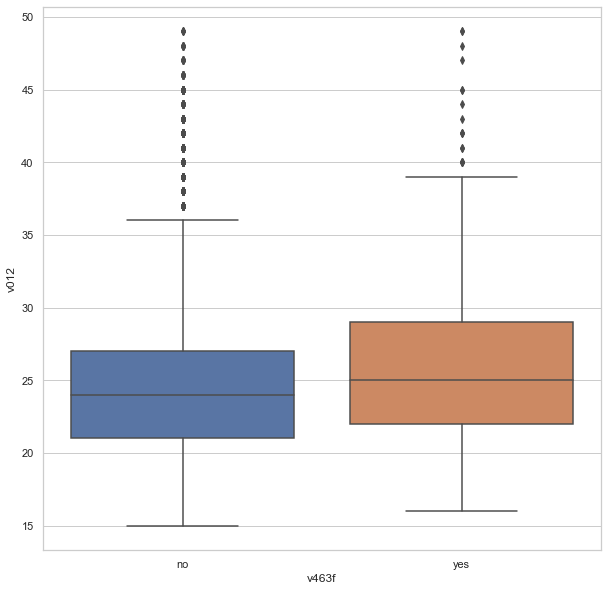

In [26]:

sns.set(style="whitegrid")

plt.figure(figsize=(10,10))

boxplot_vkm=sns.boxplot(x='v463f', y='v012', data=vkm_fhs, orient='v')

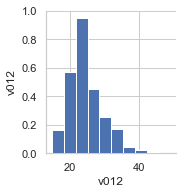

In [27]:
sns.pairplot(vkm_fhs[['v012', 'v463f']])

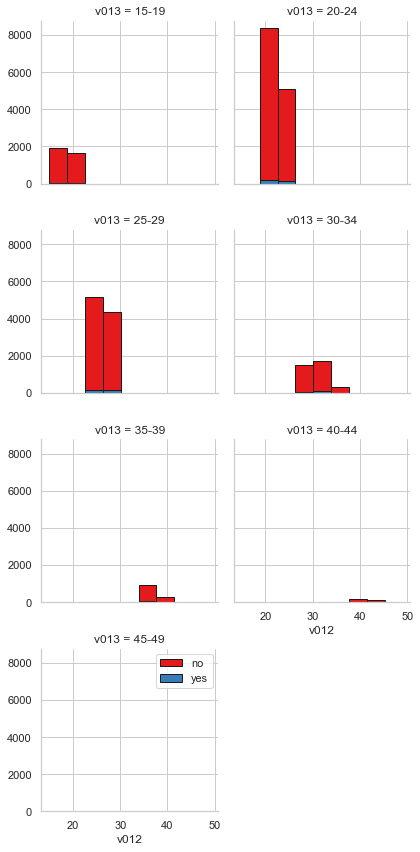

In [38]:
bins = np.linspace(vkm_fhs.v012.min(), vkm_fhs.v012.max(), 10)
g = sns.FacetGrid(vkm_fhs, col="v013", hue="v463f", palette="Set1", col_wrap=2)
g.map(plt.hist, 'v012', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [ ]:
vkm_fhs['v463f'].replace(to_replace=['no','yes'], value=[0,1],inplace=True)
vkm_fhs.head()

In [48]:
vkm_fhs.groupby(['v106'])['v463f'].value_counts(normalize=True)

v106          v463f
higher        0        0.992866
              1        0.007134
no education  0        0.953000
              1        0.047000
primary       0        0.964252
              1        0.035748
secondary     0        0.980776
              1        0.019224
Name: v463f, dtype: float64

In [49]:
#hot encoding to convert categorical variables into dichotomous/binary and appending them to featured data set

In [51]:
vkm_fhs[['v012','v106','v159']].head()

,v012,v106,v159
0,22,secondary,less than once a week
1,26,secondary,not at all
2,37,secondary,almost every day
3,29,secondary,at least once a week
4,24,secondary,less than once a week


In [53]:
feature_vk = vkm_fhs[['v012','v106','v159']]
feature_vk = pd.concat([feature_vk,pd.get_dummies(vkm_fhs['v106'])], axis=1)
feature_vk = pd.concat([feature_vk,pd.get_dummies(vkm_fhs['v159'])], axis=1)
feature_vk.drop(['no education'], axis = 1,inplace=True)
feature_vk.head()

,v012,v106,v159,higher,primary,secondary,almost every day,at least once a week,less than once a week,not at all
0,22,secondary,less than once a week,0,0,1,0,0,1,0
1,26,secondary,not at all,0,0,1,0,0,0,1
2,37,secondary,almost every day,0,0,1,1,0,0,0
3,29,secondary,at least once a week,0,0,1,0,1,0,0
4,24,secondary,less than once a week,0,0,1,0,0,1,0


In [54]:
feature_vk.drop(['v106', 'v159'], axis = 1,inplace=True)

In [55]:
feature_vk.head()

,v012,higher,primary,secondary,almost every day,at least once a week,less than once a week,not at all
0,22,0,0,1,0,0,1,0
1,26,0,0,1,0,0,0,1
2,37,0,0,1,1,0,0,0
3,29,0,0,1,0,1,0,0
4,24,0,0,1,0,0,1,0


In [56]:
#define feature data set

In [57]:
vkm=feature_vk
vkm[0:5]

,v012,higher,primary,secondary,almost every day,at least once a week,less than once a week,not at all
0,22,0,0,1,0,0,1,0
1,26,0,0,1,0,0,0,1
2,37,0,0,1,1,0,0,0
3,29,0,0,1,0,1,0,0
4,24,0,0,1,0,0,1,0


In [58]:
vk=vkm_fhs['v463f'].values
vk[0:5]

array([0, 0, 0, 0, 0])

In [59]:
#normalize the data set
#data standardization provides data zero mean and unit variance (ideally should be performed after train test split)

vkm=preprocessing.StandardScaler().fit(vkm).transform(vkm)
vkm[0:5]

array([[-0.55483029, -0.37108598, -0.38994029,  1.00867211, -0.99901368,
        -0.35690538,  3.33370064, -0.66238253],
       [ 0.2658807 , -0.37108598, -0.38994029,  1.00867211, -0.99901368,
        -0.35690538, -0.29996695,  1.50970166],
       [ 2.52283591, -0.37108598, -0.38994029,  1.00867211,  1.00098729,
        -0.35690538, -0.29996695, -0.66238253],
       [ 0.88141394, -0.37108598, -0.38994029,  1.00867211, -0.99901368,
         2.80186307, -0.29996695, -0.66238253],
       [-0.1444748 , -0.37108598, -0.38994029,  1.00867211, -0.99901368,
        -0.35690538,  3.33370064, -0.66238253]])

In [60]:
# train test splitting of data

In [61]:
from sklearn.model_selection import train_test_split

vkm_train, vkm_test, vk_train, vk_test = train_test_split( vkm, vk, test_size=0.2, random_state=4)
print ('Train set:', vkm_train.shape,  vk_train.shape)
print ('Test set:', vkm_test.shape,  vk_test.shape)

vkm_train.shape, vk_train.shape

Train set: (25942, 8) (25942,)
Test set: (6486, 8) (6486,)


((25942, 8), (25942,))

In [62]:
# train data set

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 7
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMtx=[];

for n in range(1, Ks):
  neigh = KNeighborsClassifier(n_neighbors=n).fit(vkm_train, vk_train)
  yhat = neigh.predict(vkm_test)
  mean_acc[n-1] = metrics.accuracy_score(vk_test, yhat)
  std_acc[n-1] = np.std(yhat==vk_test)/np.sqrt(yhat.shape[0])

print(mean_acc)
bestK = mean_acc.argmax()+1
print('Best Accuracy K is ', bestK)
print('Max Accuracy is', mean_acc.max())

[0.94588344 0.96793093 0.9666975  0.96916435 0.96916435 0.96916435]
Best Accuracy K is  4
Max Accuracy is 0.9691643539932162


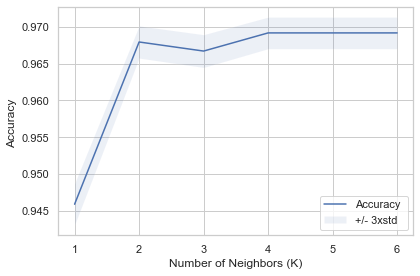

The best accuracy was with 0.9691643539932162 with k= 4


In [65]:
plt.plot(range(1,Ks),mean_acc)
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)
neigh = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(vkm_train, vk_train)

In [66]:
# f1 & Jaccard similarity score__ k=4
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
neigh = KNeighborsClassifier(n_neighbors = 7).fit(vkm_train,vk_train)
yhat=neigh.predict(vkm_test)
print("F1-SCORE:: ",f1_score( vk_test, yhat, average='weighted'))
print("JACCARD SIMILARITY SCORE:: ",jaccard_similarity_score(vk_test, yhat))

F1-SCORE::  0.9539879626059126
JACCARD SIMILARITY SCORE::  0.9691643539932162


/Users/vijaykumar_matrix_010101/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [84]:
#spliting data into train and test_for Decision_Tree____vkm

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split data
vkm_train, vkm_test, vk_train, vk_test = train_test_split(vkm, vk, test_size=0.2, random_state=2)

print('vkm_train.shape is', vkm_train.shape, 'vk_train.shape is', vk_train.shape)

vkm_train.shape is (25942, 8) vk_train.shape is (25942,)


In [93]:
#tree load___vkm

tobaccoTree = DecisionTreeClassifier(criterion="entropy")
tobaccoTree 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [94]:
#model fit___vkm
tobaccoTree.fit(vkm_train,vk_train)
predTree = loanTree.predict(vkm_test)

In [87]:
#Decision accuracy___vkm

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTree's Accuracy: ", metrics.accuracy_score(vk_test, predTree))

DecisionTree's Accuracy:  0.9736355226641998


In [88]:
#similarity score___vkm
from sklearn.metrics import jaccard_similarity_score
print("Decision Tree's jaccard_similarity_score is" ,jaccard_similarity_score( vk_test,predTree))

Decision Tree's jaccard_similarity_score is 0.9736355226641998


/Users/vijaykumar_matrix_010101/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [95]:
#fi_ score___vkm
from sklearn.metrics import f1_score
print("Decision Tree's fi_score is" ,f1_score( vk_test, predTree, average='weighted'))

Decision Tree's fi_score is 0.9606293767087606


In [73]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/vijaykumar_matrix_010101/opt/anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.1               |   py37hf985489_0         3.0 MB  conda-forge
    pydotplus-2.0.2            |             py_1          22 KB  conda-forge
    python_abi-3.7             |          2_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  pydotplus          conda-forge/noarch::pydotplus-2.0.2-py_1
  python_abi         conda-forge/osx-64

In [ ]:
##visualization_DT___vkm###
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

dot_data = StringIO()
filename = "Dtree.png"
featureNames = feature_vk.columns[:]
targetNames = vkm_fhs["v463f"].unique().tolist()
out=tree.export_graphviz(tobaccoTree, feature_names=featureNames, out_file=dot_data, class_names= np.unique(vk_train), filled=True, special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')